In [2]:
# Câu hỏi về random forest của anh Việt
with open("random_forest_question.txt", "r") as f:
    print(f.read())

Task 0: Tại sao không sử dụng toàn bộ tập train để huấn luyện cho các decision tree trong random forest mà phải chia ra từng tập con để train?
Trả lời:
- Mục đích của random forest là tạo nhiều decision trees, sau đó dựa vào voting kết quả của các trees để ra kết luận cuối cùng. Nếu sử dụng toàn bộ data để train cho tất cả các trees thì 
chúng đều cho ra kết quả giống hệt nhau, vậy chẳng khác gì train 1 decision tree.
- Tạo nhiều subset của tập training data để tạo ra tính randomness trong cấu trúc của từng tree, để mỗi tree là một bộ classifier độc lập với nhau. Như vậy thì kết quả voting cuối cùng
mới có ý nghĩa.  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Week4_1_data.csv")

In [4]:
df.head()

,customer_id,year_of_birth,educational_level,marital_status,annual_income,purhcase_date,recency,online_purchases,store_purchases,complaints,calls,intercoms
0,20201701,1982,Graduation,Single,58138.0,9/4/2012,58,8,4,0,3,11
1,20201702,1950,Graduation,Married,46344.0,3/8/2014,38,1,2,0,3,11
2,20201703,1965,Graduation,Divorced,71613.0,8/21/2013,26,8,10,0,3,11
3,20201704,1984,Graduation,Relationship,26646.0,2/10/2014,26,2,4,0,3,11
4,20201705,1981,PhD,Widowed,58293.0,1/19/2014,94,5,6,0,3,11


In [5]:
# Task 1: Thống kê số lượng khách hàng theo học vấn
df['educational_level'].value_counts()

educational_level
Graduation     257
PhD            114
Master          81
High School     40
Basic            7
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8c961fe9e0>,
 [Text(-0.05192095002159392, 1.0987739598975101, 'Graduation'),
  Text(-0.7567292904949906, -0.7983487839954091, 'PhD'),
  Text(0.49722882348088077, -0.981205124884608, 'Master'),
  Text(1.03704048779049, -0.36680652486462517, 'High School'),
  Text(1.0989319696781565, -0.04846159323925806, 'Basic')],
 [Text(-0.02832051819359668, 0.5993312508531873, '51.5%\n257'),
  Text(-0.41276143117908576, -0.4354629730884049, '22.8%\n114'),
  Text(0.2712157218986622, -0.5352027953916043, '16.2%\n81'),
  Text(0.5656584478857217, -0.2000762862897955, '8.0%\n40'),
  Text(0.5994174380062671, -0.026433596312322578, '1.4%\n7')])

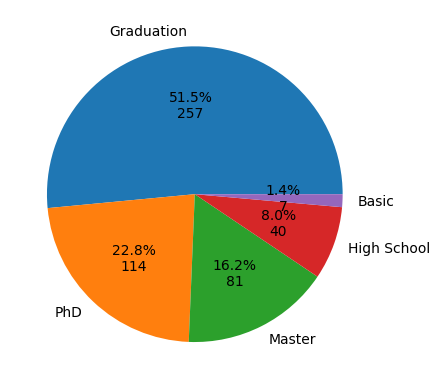

In [6]:
# Visualize
total = df['educational_level'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['educational_level'].value_counts().values, labels=df['educational_level'].value_counts().index, autopct=fmt)

In [7]:
# Task 2: In ra 20 khách hàng có thu nhập cá nhân (annual_income) cao nhất
df.nlargest(20, 'annual_income')

,customer_id,year_of_birth,educational_level,marital_status,annual_income,purhcase_date,recency,online_purchases,store_purchases,complaints,calls,intercoms
164,20201865,1952,PhD,Relationship,157243.0,3/1/2014,98,0,0,0,3,11
252,20201953,1997,Graduation,Widowed,102692.0,4/5/2013,5,6,13,0,3,11
203,20201904,1989,PhD,Single,102160.0,11/2/2012,54,7,10,0,4,11
124,20201825,1957,Graduation,Single,101970.0,3/12/2013,69,6,13,0,3,11
424,20202125,1967,PhD,Married,93027.0,4/13/2013,77,7,5,0,3,11
426,20202127,1957,Graduation,Married,92910.0,4/24/2014,42,6,13,0,3,11
140,20201841,1987,Master,Single,92859.0,10/19/2012,46,5,12,0,3,2
418,20202119,2000,Graduation,Single,91065.0,2/22/2013,33,7,9,0,3,11
116,20201817,2000,Graduation,Relationship,90765.0,1/24/2014,25,4,5,0,3,11
456,20202157,1957,High School,Single,89572.0,9/15/2012,44,7,9,0,3,11


In [8]:
# Task 3: In ra những khách hàng sinh sau năm 1960 và thu nhập cá nhân trên $50000/năm
df.loc[(df['year_of_birth'] >= 1960) & (df['annual_income']>=50000)]


,customer_id,year_of_birth,educational_level,marital_status,annual_income,purhcase_date,recency,online_purchases,store_purchases,complaints,calls,intercoms
0,20201701,1982,Graduation,Single,58138.0,9/4/2012,58,8,4,0,3,11
2,20201703,1965,Graduation,Divorced,71613.0,8/21/2013,26,8,10,0,3,11
4,20201705,1981,PhD,Widowed,58293.0,1/19/2014,94,5,6,0,3,11
5,20201706,1967,Master,Relationship,62000.0,9/9/2013,16,6,10,5,3,11
6,20201707,1971,Graduation,Divorced,55635.0,11/13/2012,34,7,7,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...
486,20202187,1976,Master,Relationship,56290.0,11/14/2013,4,3,7,0,11,11
487,20202188,1974,Graduation,Married,60093.0,6/26/2013,92,7,10,0,3,11
493,20202194,1964,Master,Single,58308.0,1/12/2013,77,2,3,0,3,11
495,20202196,1962,Master,Divorced,59432.0,4/13/2013,88,5,11,0,3,11


In [9]:
# Task 4: Kết hợp điều kiện của Task 2 & 3
df.loc[(df['year_of_birth'] >= 1960) & (df['annual_income']>=50000)].nlargest(20, 'annual_income')

,customer_id,year_of_birth,educational_level,marital_status,annual_income,purhcase_date,recency,online_purchases,store_purchases,complaints,calls,intercoms
252,20201953,1997,Graduation,Widowed,102692.0,4/5/2013,5,6,13,0,3,11
203,20201904,1989,PhD,Single,102160.0,11/2/2012,54,7,10,0,4,11
424,20202125,1967,PhD,Married,93027.0,4/13/2013,77,7,5,0,3,11
140,20201841,1987,Master,Single,92859.0,10/19/2012,46,5,12,0,3,2
418,20202119,2000,Graduation,Single,91065.0,2/22/2013,33,7,9,0,3,11
116,20201817,2000,Graduation,Relationship,90765.0,1/24/2014,25,4,5,0,3,11
109,20201810,1993,Master,Single,89058.0,12/7/2012,18,5,4,0,3,7
67,20201768,1984,High School,Divorced,88194.0,3/19/2014,19,11,10,1,3,11
198,20201899,1984,Graduation,Widowed,86718.0,1/17/2013,20,5,5,0,3,2
407,20202108,1989,PhD,Relationship,86164.0,5/30/2014,1,5,5,0,8,11


In [10]:
# Task 5: in ra những khách hàng có tình trạng hôn nhân là đã kết hôn or đã ly hôn
df.loc[df['marital_status'].isin(('Married','Divorced'))]

,customer_id,year_of_birth,educational_level,marital_status,annual_income,purhcase_date,recency,online_purchases,store_purchases,complaints,calls,intercoms
1,20201702,1950,Graduation,Married,46344.0,3/8/2014,38,1,2,0,3,11
2,20201703,1965,Graduation,Divorced,71613.0,8/21/2013,26,8,10,0,3,11
6,20201707,1971,Graduation,Divorced,55635.0,11/13/2012,34,7,7,0,3,11
7,20201708,1985,PhD,Married,33454.0,5/8/2013,32,4,4,0,3,11
12,20201713,1959,Graduation,Divorced,63033.0,11/15/2013,82,3,8,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...
488,20202189,1969,Graduation,Married,14045.0,1/26/2014,24,1,3,0,3,11
491,20202192,1976,Graduation,Divorced,46310.0,12/3/2012,99,6,5,0,3,11
494,20202195,1944,PhD,Divorced,55614.0,11/27/2013,85,9,6,0,3,11
495,20202196,1962,Master,Divorced,59432.0,4/13/2013,88,5,11,0,3,11


In [11]:
# Task 6: Tính mức thu nhập trung bình theo trình độ học vấn
df.groupby(['educational_level'])['annual_income'].mean()


educational_level
Basic          19514.571429
Graduation     51607.827309
High School    44154.717949
Master         51191.700000
PhD            55878.990991
Name: annual_income, dtype: float64

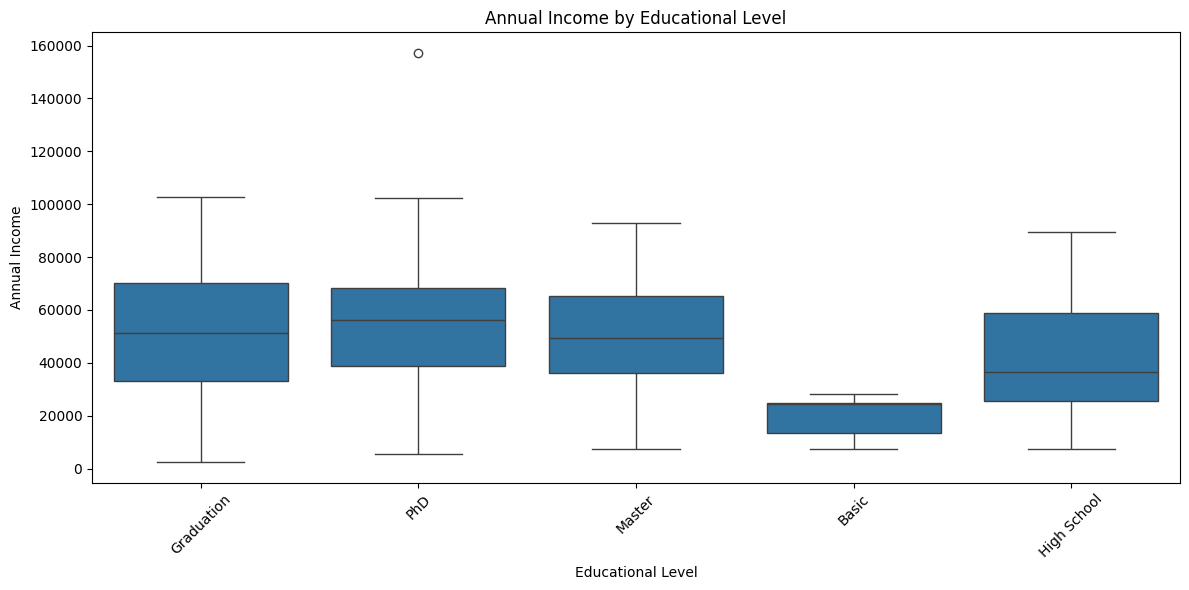

In [12]:
# Visualize
plt.figure(figsize=(12, 6))
sns.boxplot(x='educational_level', y='annual_income', data=df)
# sns.barplot(x='educational_level', y='annual_income', data=df)
plt.title('Annual Income by Educational Level')
plt.ylabel('Annual Income')
plt.xlabel('Educational Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Task 7: Tính mức thu nhập trung bình theo trình độ học vấn + tình trạng hôn nhân
df.groupby(['educational_level','marital_status'])['annual_income'].mean()


educational_level  marital_status
Basic              Divorced          20797.000000
                   Relationship      16443.000000
                   Single            24882.000000
Graduation         Divorced          52448.104167
                   Married           49598.723077
                   Relationship      53291.142857
                   Single            51719.431034
                   Widow             48097.500000
                   Widowed           52221.600000
High School        Divorced          49483.333333
                   Married           38747.533333
                   Relationship      51574.692308
                   Single            48451.800000
                   Widow             28457.000000
                   Widowed           25592.000000
Master             Divorced          46979.583333
                   Married           52810.526316
                   Relationship      46005.789474
                   Single            56847.142857
                

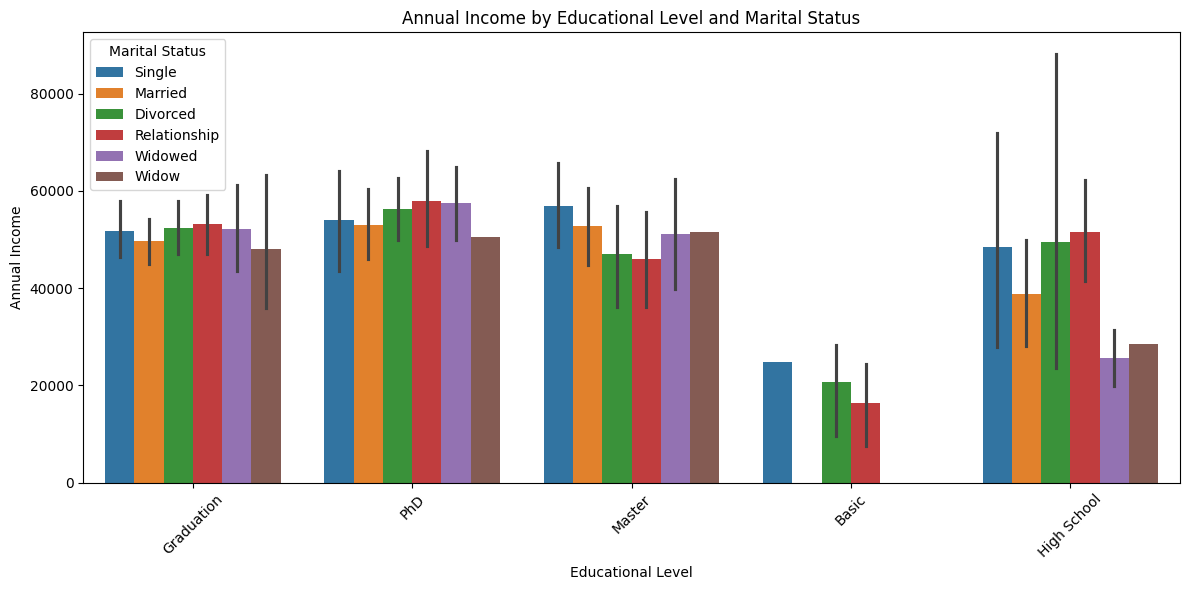

In [14]:
# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='educational_level', y='annual_income', hue='marital_status', data=df)
plt.title('Annual Income by Educational Level and Marital Status')
plt.ylabel('Annual Income')
plt.xlabel('Educational Level')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Task 8: Đưa ra các kết luận, đánh giá về các phân khúc khách hàng dựa vào kết quả của task 1-7
with open('conclusion.txt') as f:
    print(f.read())

Kết luận: 
- Phần lớn khách hàng có trình độ học vấn là Graduation (51.5%). Khách hàng có trình độ Basic chiếm tỉ trọng ít nhất (1.4%)
- Khách hàng sinh sau 1960 và có mức lương trên $50000 chiếm 41.16% tổng số lượng khách hàng.
- Khách hàng thuộc trình độ học vấn PhD có thu nhập cao nhất. 
- Nên tập trung vào tệp khách hàng có trình độ học vấn cao. 

